In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [23]:
data = pd.read_csv('housing_price_dataset.csv')

In [24]:
data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


## Data preprocessing

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


* We can see that there are no null values, so there is no need to remove or fill any rows.

In [26]:
data.describe(include=('O')).T

,count,unique,top,freq
Neighborhood,50000,3,Suburb,16721


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SquareFeet,50000.0,2006.374680,575.513241,1000.000000,1513.000000,2007.000000,2506.000000,2999.000000
Bedrooms,50000.0,3.498700,1.116326,2.000000,3.000000,3.000000,4.000000,5.000000
Bathrooms,50000.0,1.995420,0.815851,1.000000,1.000000,2.000000,3.000000,3.000000
YearBuilt,50000.0,1985.404420,20.719377,1950.000000,1967.000000,1985.000000,2003.000000,2021.000000
Price,50000.0,224827.325151,76141.842966,-36588.165397,169955.860225,225052.141166,279373.630052,492195.259972


* The minimum value of price in the dataset is -36588.16, which is not possible. Therefore, values less than 0 need to be removed.

In [28]:
data = data[data['Price'] > 0]

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SquareFeet,49978.0,2006.752551,575.350298,1000.00000,1514.00000,2008.000000,2506.000000,2999.000000
Bedrooms,49978.0,3.498659,1.116325,2.00000,3.00000,3.000000,4.000000,5.000000
Bathrooms,49978.0,1.995458,0.815859,1.00000,1.00000,2.000000,3.000000,3.000000
YearBuilt,49978.0,1985.404338,20.718407,1950.00000,1967.00000,1985.000000,2003.000000,2021.000000
Price,49978.0,224931.667960,75995.682992,154.77912,170007.48713,225100.123857,279395.826288,492195.259972


In [30]:
data.duplicated().sum()

0

* So, as there is no need to clean up or make any changes to the data, we can now proceed to the next step, which is Exploratory Data Analysis (EDA).

## EDA

### Univariate Analysis

<Axes: xlabel='SquareFeet', ylabel='Count'>

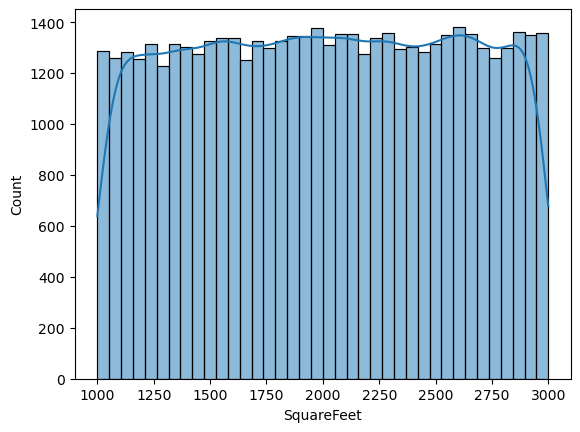

In [31]:
sns.histplot(data=data, x = 'SquareFeet',kde=True)

<Axes: xlabel='Bedrooms', ylabel='Count'>

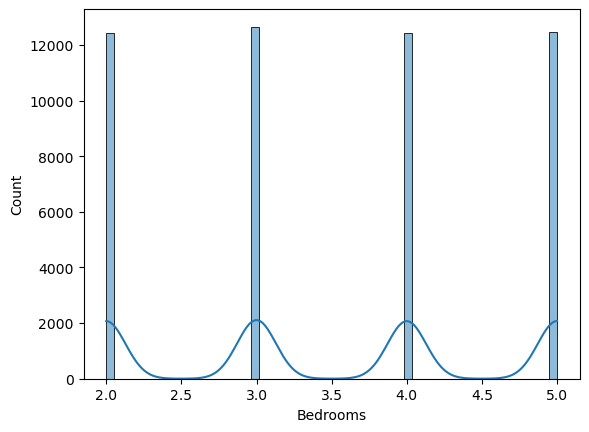

In [32]:
sns.histplot(data=data , x = 'Bedrooms', kde=True)

<Axes: xlabel='Bathrooms', ylabel='Count'>

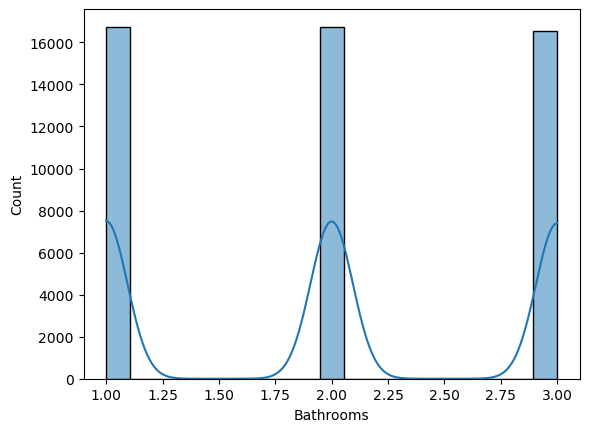

In [33]:
sns.histplot(data=data , x = 'Bathrooms', kde=True)

<Axes: xlabel='Price', ylabel='Count'>

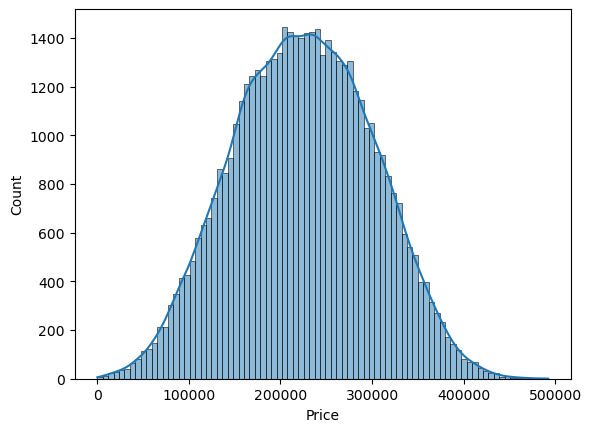

In [34]:
sns.histplot(data=data , x = 'Price', kde=True)

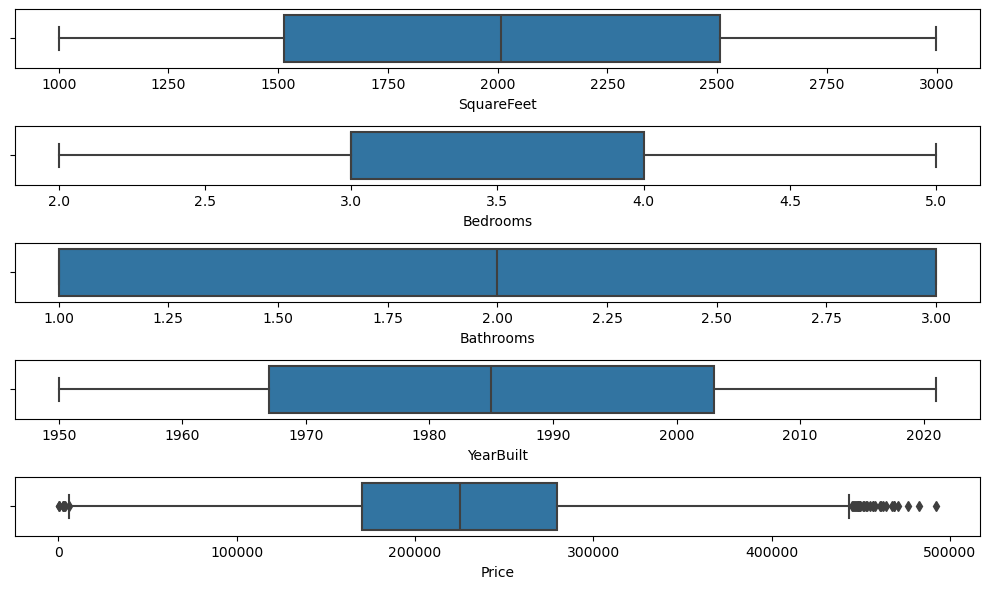

In [35]:
column_name = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt','Price']
plt.figure(figsize=(10,6))
plotnumber = 1
for i in range(len(column_name)):
    ax = plt.subplot(5,1,plotnumber)
    sns.boxplot(x=column_name[i],data = data)
    plotnumber +=1
    plt.tight_layout()

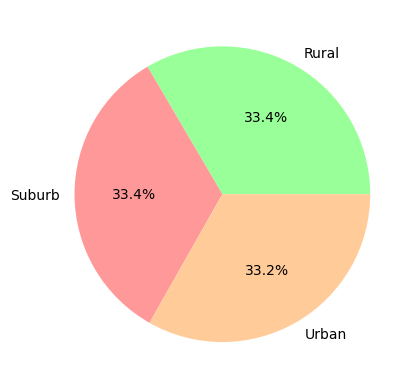

In [36]:
neighbour_counts = data['Neighborhood'].value_counts()
color = ['#99FF99','#FF9999', '#FFCC99', '#66B2FF']
plt.pie(neighbour_counts,data=data,labels  = data.Neighborhood.unique(),autopct='%1.1f%%',colors=color)
plt.show()

### Bivariate Analysis

In [37]:
num_column = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']

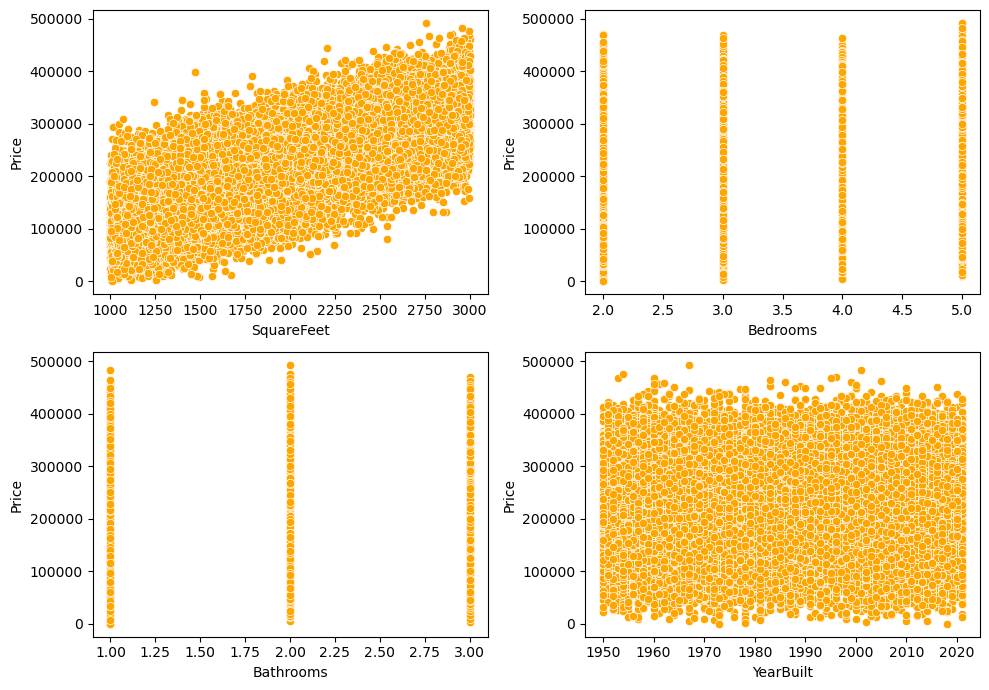

In [38]:
plt.figure(figsize=(10,7))
plotnumber = 1
for i in range(len(num_column)):
    ax = plt.subplot(2,2,plotnumber)
    sns.scatterplot(data = data, x = num_column[i], y = 'Price',color='orange')
    plotnumber += 1
    plt.tight_layout()

* Upon examining the graph, it appears that the "yearbuilt" column may not hold significant importance. Consequently, we may consider dropping this column from the dataset.

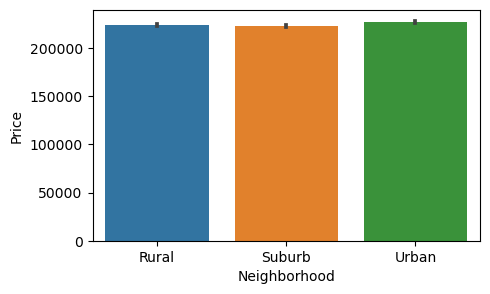

In [39]:
plt.figure(figsize=(5,3))
sns.barplot(data = data, x = 'Neighborhood', y='Price')
plt.show()

### Multivariate Analysis

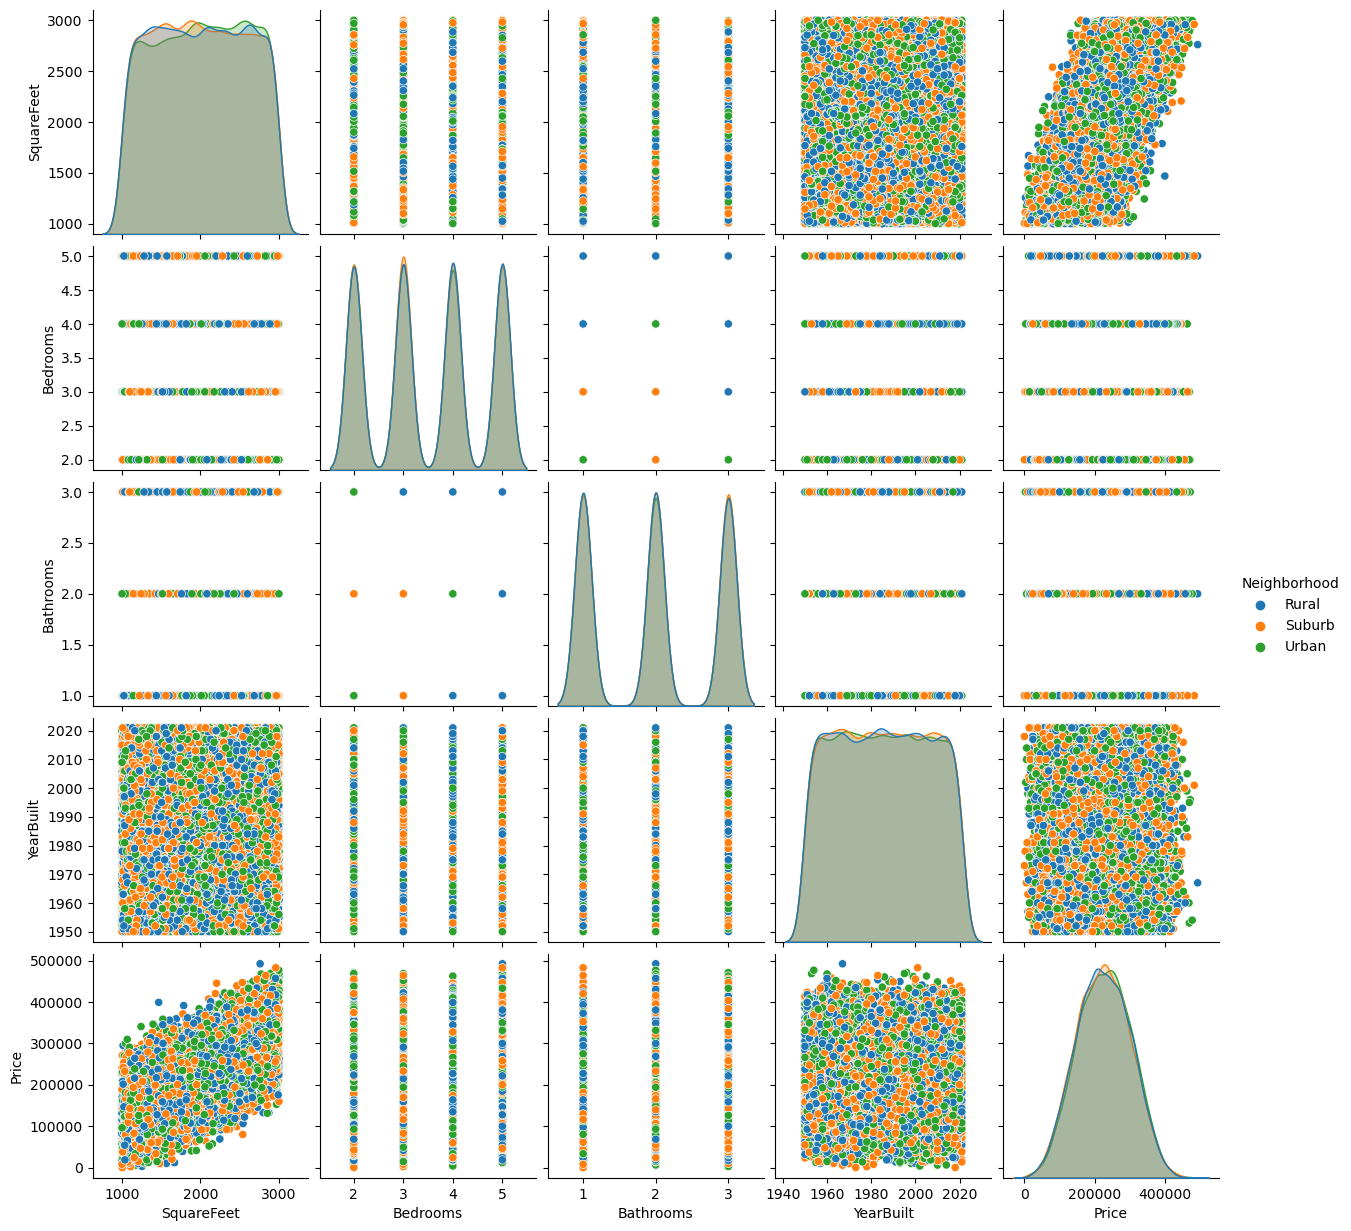

In [40]:
sns.pairplot(data,vars=["SquareFeet","Bedrooms","Bathrooms","YearBuilt",'Price'],hue = 'Neighborhood')
plt.show()

<Axes: >

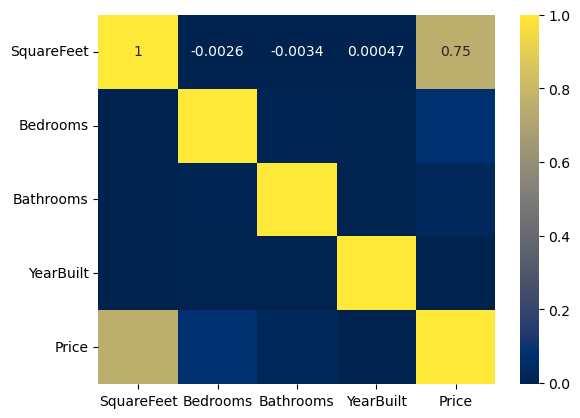

In [41]:
sns.heatmap(data.drop('Neighborhood',axis=1).corr(),annot=True,cmap='cividis')

* The relationship between square feet and price is stronger, with a correlation coefficient of 0.75.

## Build a Model

In [42]:
data = pd.get_dummies(data).astype(int)
data.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355,1,0,0
1,2459,3,2,1980,195014,1,0,0
2,1860,2,1,1970,306891,0,1,0
3,2294,2,1,1996,206786,0,0,1
4,2130,5,2,2001,272436,0,1,0


In [43]:
x = data.drop('Price',axis=1)
y = data['Price']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size = 0.25,random_state = 57)

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [46]:
y_pred = lr.predict(x_test)
y_pred = pd.DataFrame(y_pred)

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(y_test,y_pred)

0.5698928465829602